In [35]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


df = pd.read_csv('../data/transactions.csv')
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'])
df.head()


,CustomerID,PurchaseAmount,PurchaseDate,Category,PaymentMethod
0,101,250,2023-06-01,Electronics,Card
1,102,80,2023-06-02,Groceries,Cash
2,103,120,2023-06-03,Clothing,UPI
3,104,300,2023-06-04,Electronics,Card
4,105,150,2023-06-05,Furniture,UPI


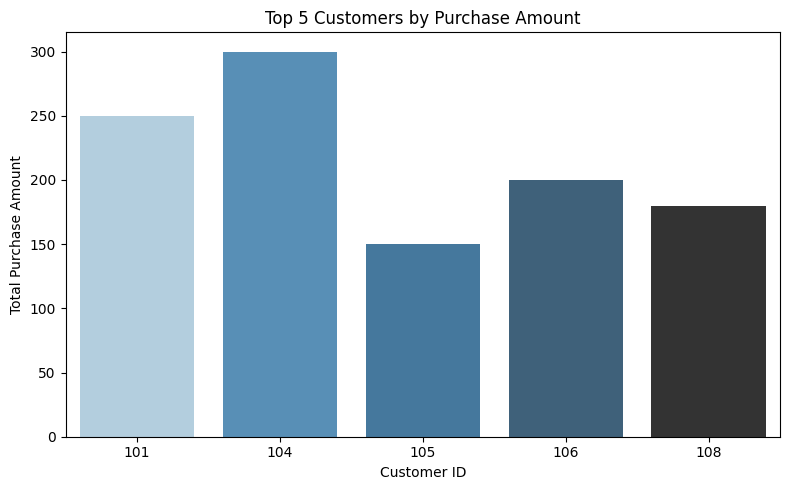

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

top_customers = df.groupby('CustomerID')['PurchaseAmount'].sum().nlargest(5)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_customers.index, y=top_customers.values, hue=top_customers.index, palette='Blues_d', legend=False)
plt.title('Top 5 Customers by Purchase Amount')
plt.xlabel('Customer ID')
plt.ylabel('Total Purchase Amount')
plt.tight_layout()
plt.savefig('../visualizations/static_bar_chart.png')
plt.show()



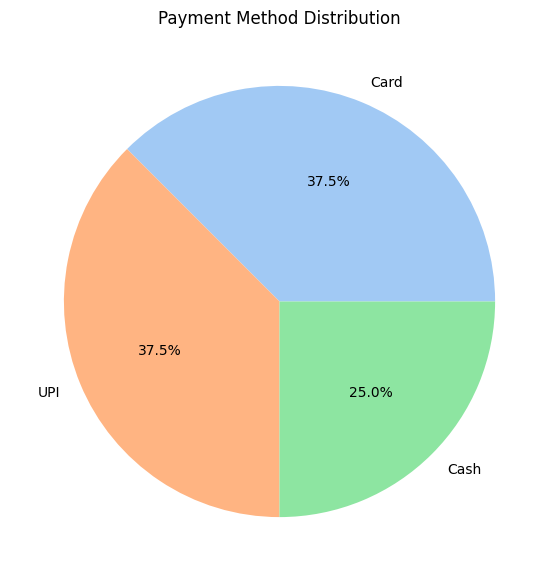

In [41]:
payment_counts = df['PaymentMethod'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Payment Method Distribution')
plt.savefig('../visualizations/static_pie_chart.png')
plt.show()




In [33]:
monthly_sales = df.resample('M', on='PurchaseDate')['PurchaseAmount'].sum()
fig = px.line(monthly_sales, title='Monthly Purchase Trend', labels={'value': 'Total Sales', 'PurchaseDate': 'Month'})
fig.write_html('../visualizations/interactive_line_chart.html')
fig.show()


C:\Users\AYUSH\AppData\Local\Temp\ipykernel_18064\3952469066.py:1: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [34]:
cust_summary = df.groupby('CustomerID').agg({'PurchaseAmount': 'sum', 'PurchaseDate': 'count'}).rename(columns={'PurchaseDate': 'Frequency'})
fig = px.scatter(cust_summary, x='Frequency', y='PurchaseAmount', 
                 title='Customer Frequency vs. Total Spending',
                 labels={'PurchaseAmount': 'Total Spending', 'Frequency': 'Number of Purchases'})
fig.write_html('../visualizations/interactive_scatter_chart.html')
fig.show()

